In [1]:
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
from numpy.linalg import inv 

import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt from scipy.spatial.distance

# create multivariate distribution
# generate points along axis
x = np.linspace(-2,2,400)
y_axis = np.linspace(-2,2,400)
W = [-1.3,0.5]
eps = np.random.normal(0,0.3,[400,1])
y_results = W[0]*x + W[1] 
for i in range(len(y_results)):
    y_results[i] = y_results[i] + eps[i]


# print(y)

plt.scatter(x,y_results)

plt.show()

<Figure size 640x480 with 1 Axes>

2


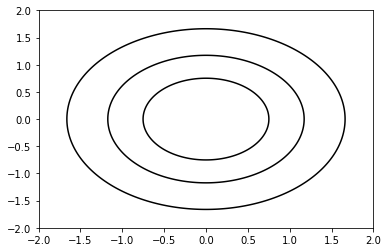

In [2]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

mu = np.array([0,0])
print(mu.size)
cov = np.eye(2)

# create multivariate distribution
pdf = multivariate_normal(mu,cov) # generate points along axis

x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)

x1p,x2p = np.meshgrid(x,y)
pos = np.vstack((x1p.flatten(),x2p.flatten()))
pos = pos.T

# evaluate pdf at points
Z = pdf.pdf(pos)
Z = Z.reshape(400,400)

fig = plt.figure()
ax = fig.gca()
pdf_c = ax.contour(x1p,x2p,Z,3,colors='k')

plt.show();

In [3]:
def nDataModel(n):
    randomIndex = []
    X = np.ones((n,2))
    
    Y = np.ones(n)
    
    for i in range(0,n):
        
        X[i,0] = x[i]
        
        Y[i] = y_results[i]
    
    
    m_0 = mu
    s_0 = cov

    #print(Y)
    
    beta = 0.3
    s_n = inv(inv(s_0) + beta*np.matmul(X.T,X))

    m_n = np.matmul(s_n,((np.matmul(inv(s_0),m_0))+beta * np.matmul(X.T,Y)))
    
    posterior = multivariate_normal(m_n,s_n)


    Z1 = posterior.pdf(pos)
    Z1 = Z1.reshape(400,400)

    plt.contour(x1p,x2p,Z1,3,colors='red')
    plt.show()
    return (m_n, s_n)
       

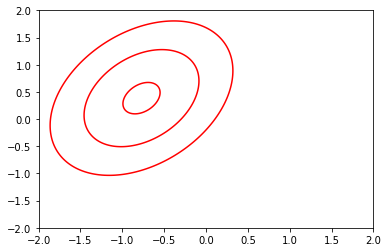

In [4]:
#posterior for 1 random point

m_n_1, s_n_1  = nDataModel(1)




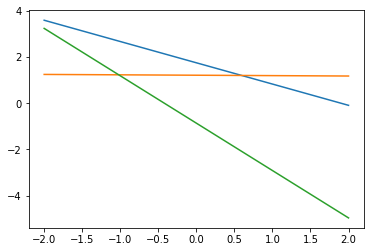

In [5]:

#samples from the 1 point posterior
def sample_n_points(m_n, s_n, n):
    lines =[]
    sample = np.random.multivariate_normal(m_n,s_n,n)
    

   
    
    for i in range(0,n):
        lines.append(sample[i][0]*x + sample[i][1])
        plt.plot(x, lines[i])
        
        
    
    

    

    plt.show();


    
    
        
sample_n_points(m_n_1,s_n_1,3)        
    
    
    

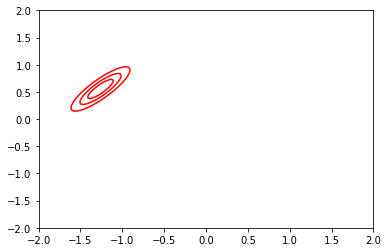

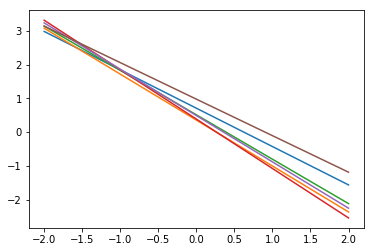

In [6]:
m_n_100, s_n_100 = nDataModel(199)


sample_n_points(m_n_100,s_n_100,6)

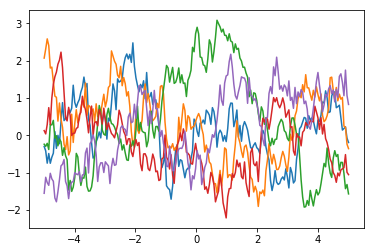

In [81]:
#QUESTION 13
x = np.linspace(-5,5,200)
x = x.reshape(-1,1)
mu = np.zeros(x.shape)

# compute covariance matrix
K = np.exp(-cdist(x,x,'euclidean'))
# now we have the mean function and the covariance function # the GP is fully described
f = np.random.multivariate_normal(mu.flatten(),K,5)
# plot the data
plt.plot(x,f.T)
plt.show()





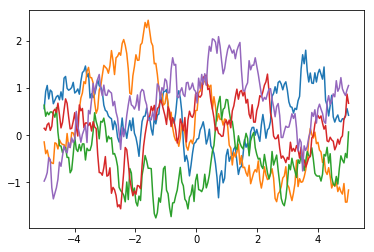

In [8]:
x = np.linspace(-5,5,200)
x = x.reshape(-1,1)
mu = np.zeros(x.shape)

# compute covariance matrix
K = np.exp(-cdist(x,x,'euclidean')/2)
# now we have the mean function and the covariance function # the GP is fully described
f = np.random.multivariate_normal(mu.flatten(),K,5)
# plot the data
plt.plot(x,f.T)
plt.show()




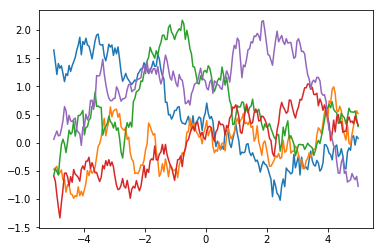

In [9]:
x = np.linspace(-5,5,200)
x = x.reshape(-1,1)
mu = np.zeros(x.shape)

# compute covariance matrix
K = np.exp(-cdist(x,x,'euclidean')/5)
# now we have the mean function and the covariance function # the GP is fully described
f = np.random.multivariate_normal(mu.flatten(),K,5)
# plot the data
plt.plot(x,f.T)
plt.show()

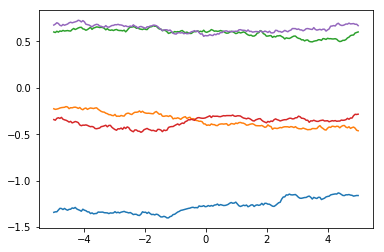

In [10]:
x = np.linspace(-5,5,200)
x = x.reshape(-1,1)
mu = np.zeros(x.shape)

# compute covariance matrix
K = np.exp(-cdist(x,x,'euclidean')/1000)
# now we have the mean function and the covariance function # the GP is fully described
f = np.random.multivariate_normal(mu.flatten(),K,5)
# plot the data
plt.plot(x,f.T)
plt.show()

(200, 1)


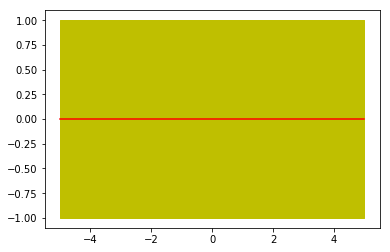

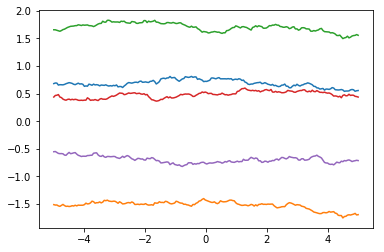

In [93]:
x = np.linspace(-5,5,200)
x = x.reshape(-1,1)
mu = np.zeros(x.shape)


# compute covariance matrix
K = np.exp(-cdist(x,x,'euclidean')/20**2)
# now we have the mean function and the covariance function # the GP is fully described
f = np.random.multivariate_normal(mu.flatten(),K,5)
# plot the data

print(mu.shape)

plt.plot(x,mu,color='r')
    
plt.fill_between(x.flatten(), mu.flatten()-[np.sqrt(K[i][i]) for i in range(200)], mu.flatten() + [np.sqrt(K[i][i]) for i in range(200)],color = "y")
    
plt.show()


plt.plot(x,f.T)
plt.show()

## QUESTION 14

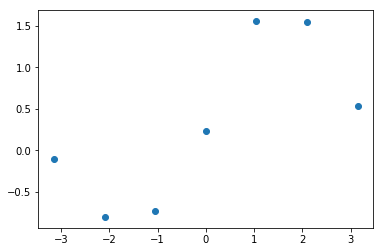

In [72]:
def kernel(x,y,l):
    return np.exp(-cdist(x,y,'euclidean')/l**2)

eps = np.random.normal(0,0.5,[100,1])
X = np.linspace(-np.pi, np.pi,7)
X = X.reshape(-1,1)

Y = np.sin(X)

# y_noise= np.zeros(f.size)

for i in range(len(Y)):
    Y[i] = Y[i] + eps[i]


plt.scatter(X,Y)
plt.show()

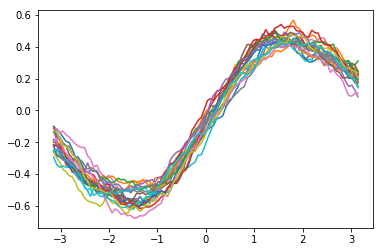

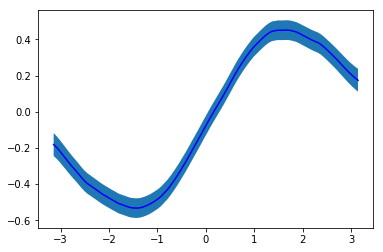

In [94]:
#prior parameters
X = np.linspace(-np.pi-0.5,np.pi+0.5,100)
X = X.reshape(-1,1)

x = np.linspace(-np.pi,np.pi,100)
x = x.reshape(-1,1)

Y = np.sin(X)

for i in range (len(Y)):
    Y[i] = Y[i] + eps[i]

# mu = np.zeros(x.shape)



def predictive_posterior(x,Y):
    K = kernel(X,X,20)
    K_2 = kernel(X,x,20).T
    K_3 = kernel(x,x,20)

    mean = K_2 @ inv((K) + ((0.3**2) * np.eye(100))) @ Y
    sigma = K_3 - K_2 @ inv((K) + ((0.3**2) * np.eye(100))) @ K_2.T
    
    return (mean,sigma)

def plot_pp(mean,sigma,n):
    f = np.random.multivariate_normal(mean.flatten(), sigma,n)
    
    #plotting the functions
    
    plt.figure(1)
    plt.plot(x,f.T)
    
    #plotting the space of the function with updated mean values and variance
    
    plt.figure(2)
    plt.plot(x,mean,color='b')
    
    plt.fill_between(x.flatten(), mean.flatten()-[np.sqrt(sigma[i][i]) for i in range(100)], mean.flatten() + [np.sqrt(sigma[i][i]) for i in range(100)])
    
    plt.show()
    
m,s = predictive_posterior(x,Y)
plot_pp(m,s,20)
    
# #compute covariance matrix -- l =1, sigma = 1
# kernelCov = np.exp(-cdist(x,x,'euclidean'))

# prior = multivariate_normal(mu.flatten(), kernelCov)

# mean = np.exp(-cdist(0.5,x)).T .matmul(inv(np.exp(-cdist(x,x))))

# def kernel(x_i,x_j):
#     return np.exp(-cdist(x_i,x_j))
# data_point  = np.ones((7,1))
# for i in range(len(data_point)):
#     data_point[i] = np.random.uniform(0,3);



# mean = np.matmul(kernel(data_point, x).T,np.matmul(inv(kernel(x,x)),f))

# sigma = np.matmul(kernel(data_point, data_point) - kernel(data_point, x).T,np.matmul(inv(kernel(x,x)), kernel(x,data_point)))


# pred = multivariate_normal(mean.flatten(),sigma)

# # x1p,x2p = np.meshgrid(x,y)
# # pos = np.vstack((x1p.flatten(),x2p.flatten()))
# # pos = pos.T
# # print(pos.shape)
# # print(pos)

# # # evaluate pdf at points
# # Z = prior.pdf(pos)
# # Z = Z.reshape(7,7)

# # fig = plt.figure()
# # ax = fig.gca()
# # pdf_c = ax.contour(x1p,x2p,Z,3,colors='k')

# # plt.show();


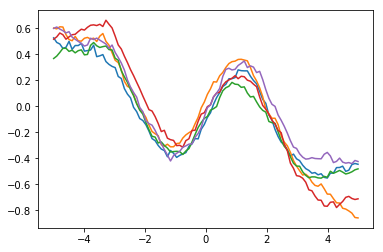

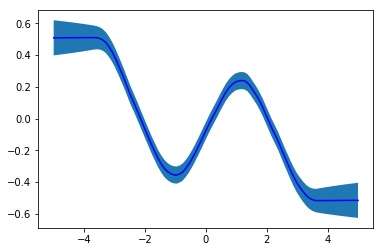

In [79]:
#taking other values for x*

x = np.linspace(-5,5,100)
x = x.reshape(-1,1)

Y = np.sin(x)
for i in range (len(Y)):
    Y[i] = Y[i] + eps[i]

m,s = predictive_posterior(x,Y)
plot_pp(m,s,5)

         Current function value: 4766.369864
         Iterations: 0
         Function evaluations: 109
         Gradient evaluations: 97


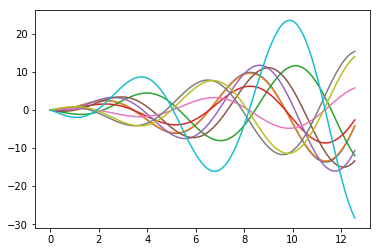

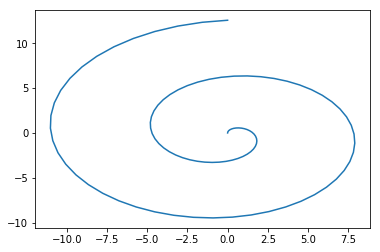

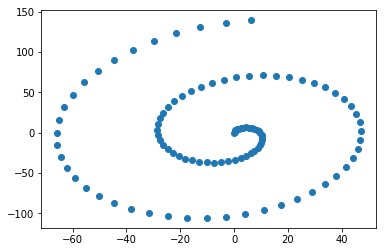

In [61]:
#QUESTION 21

import scipy.optimize as opt
#Create Objective

x = np.linspace(0,np.pi*4,100)
A = np.ones((10,2))

for i in range(0,10):
    A[i][0] = np.random.normal(0,1)
    A[i][1] = np.random.normal(0,1)

def f_non_lin(x):
    temp = np.matrix([[x[i]*np.sin(x[i]),x[i]*np.cos(x[i])] for i in range(100)])
    return temp


def f_lin(x):
    temp = A @ x.T
    return temp.T

X_non = f_non_lin(x)
Y = f_lin(X_non)

def dC(W,i,j):
    W = W.reshape((10,2))
    J1 = np.zeros((2,10))
    J2 = np.zeros((10,2))
    
    np.put(J1, [i,j], 1)
    np.put(J2, [j,i], 1)
    
    return (W @ J1) + (J2 @ W.T)

def objective(W, Y):
    W = W.reshape((10,2))
    C = W @ W.T + np.eye(10)
    det = np.log(np.linalg.det(C))
    total = 0
    
    for i in range(100):
        total += Y.T[:,i].T @ inv(C) @ Y.T[:,i]
        
    return 70 + det + total

# return the value of the objective at x return val
def dfx(W,Y):
    W = W.reshape((10,2))
    result = np.array([[derivative(W,i,j) for j in range(2)] for i in range(10)]).flatten()
    return result

def derivative(W,i,j):
    W = W.reshape((10,2))
    C = W @ W.T
    
    result1 = np.trace(inv(C) @ dC(W,i,j))
    result2 = np.trace(Y.T @ Y @ (-inv(C) @ dC(W,i,j) @ inv(C)))
                       
    return result1 + result2

# return the gradient of the objective at x return val

x_star = opt.fmin_cg(objective,A.flatten(),fprime=dfx, args=(Y,)).reshape((10,2))


plt.figure(1)
plt.plot(x,Y)

plt.figure(2)
plt.plot(X_non[:,0],X_non[:,1])

plt.figure(3)
j = (x_star.T @ Y.T).T
plt.scatter([j[:,0]],[j[:,1]])
plt.show()

    